#### Part -1

##### Question 1: What is the augmented operation for dividing a number?

In [63]:
x=10
y=2
x/=y
print(x)

5.0


##### Question 2: If you want to store a list of unique keys and values, which data structure should be used? What about storing just the keys, what data structure would work best here?

In [64]:
dict()
set()

set()

##### Question 3: If you have a list and a set of the same three strings, and you attempt to change element index 0 to ‘new’ what will happen? What is the name of the property that comes into play here and what is it useful for?

In [65]:
alist = ["abc", "abc", "abc"]
alist[0] = "new"
alist

['new', 'abc', 'abc']

Elements can be modified.

Individual values can be replaced.

The order of elements can be changed.

##### Question 4: If I have a dataframe df, and I want to create two variables df_v, and df_r, where df_v is a direct copy of df, and df_r is a reference that will be change if df is changed, how would I do this?

In [66]:
import pandas as pd
df = pd.DataFrame(columns= ["a", "b"])
df1 = df.copy() # direct copy
df2 = df # refernce

In [67]:
df

,a,b


In [68]:
df2.columns = ["x", "y"]

In [69]:
df2

,x,y


In [70]:
df

,x,y


In [71]:
df1

,a,b


##### Question 5: In pandas, what is the difference between axis =1 and axis = 0?

axis=0  → rows or horizontal axis
axis=1  → columns or vertical axis


##### (Optional -- 2 points of bonus) Question 6: What is the benefit of using classes? What about inheritance? 

Classes provide an easy way of keeping the data members and methods together and hence making the program more organized and reduces complexity
Use of inheritances provides  code reusable and flexibility and we can override the methods from parent class in child class.


#### Part -2 

##### Q. 1

Import numpy, seaborn, and pandas as their standard names. 

Using the seaborn function load_dataset, read in the dataset ‘mpg’ 

Print the datatypes once loaded (df.dtypes). 

Drop any duplicate name values, and any rows which have nan values across any column. 

In [72]:
import numpy as np
import seaborn as sns
import pandas as pd
df = sns.load_dataset('mpg')
df.shape
df.dtypes
df.dropna(axis=0, how='any', inplace=True)
df.shape


(392, 9)

In [73]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


##### Q. 2

Create another dataframe t_df with only columns: horsepower and weight. Using slicing notation cut the dataset in half, keeping the first half of the rows. Hint: You will need to calculate the midpoint.

In [74]:
t_df = df[['horsepower', 'weight']]
t_df.shape
mid_point = len(t_df)//2
print(mid_point)
first_half_t_df = t_df.iloc[:196]
second_half_t_df = t_df.iloc[196:]
print("First half shape: ", first_half_t_df.shape, "Second half shape: ", second_half_t_df.shape)

196
First half shape:  (196, 2) Second half shape:  (196, 2)


##### Q.3

Create a class called mather with a constructor that takes in a single number and assigns it to class variable offset. Write a single function offsetter in mather which takes in a number, adds offset to it, and returns the result. Use an augmented operator

In [75]:
class Mather:
    def __init__(cls, offset_val: int):
        cls.offset = offset_val
    
    def offsetter(cls, num: int):
        num += cls.offset
        return num 


##### Q.4

Create another class proxy which inherits mather, initialize an object of proxy called tester and pass in 1 for the offset. 

In [76]:
class Proxy(Mather):
    pass
    
tester = Proxy(1)

In [77]:
tester.offsetter(40)

41

##### Q.5

Write a class function in proxy called divisibility which takes in a numeric value offset. 

Check if the variable is  either an int or float (reference the datatypes above for the exact dtypes), 
if it is not a numeric value return np.nan. 

Apply offsetter from the parent class to the value

Check if the resulting number is divisible by 2 and if so return ‘even’, 
if it is not divisible by 2 then return ‘odd’

In [78]:
class Proxy(Mather):
    def divisibility(cls, num_float: float):
        if type(num_float) == int or type(num_float) == np.float64:
            offset_result = cls.offsetter(num_float)
            if offset_result%2 == 0:
                return "even"
            else:
                return "odd"
        else:
            return np.nan

In [79]:
tester = Proxy(1)

In [80]:
tester.divisibility(40)

'odd'

In [81]:
tester.divisibility(41)

'even'

In [82]:
tester.divisibility(True)

nan

In [83]:
tester.divisibility('foo')

nan

##### Q.6

Use tester to apply divisibility to both columns in t_df 

and return the result into new columns ‘horsepower offset evenness’ and ‘weight offset evenness’

In [84]:
t_df.loc[:,'horsepower offset evenness'] = t_df.apply(lambda row: tester.divisibility(row['horsepower']),axis=1)
t_df.loc[:,'weight offset evenness'] = t_df.apply(lambda row: tester.divisibility(row['weight']),axis=1)
t_df.head(10)

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,horsepower,weight,horsepower offset evenness,weight offset evenness
0,130.0,3504,odd,odd
1,165.0,3693,even,even
2,150.0,3436,odd,odd
3,150.0,3433,odd,even
4,140.0,3449,odd,even
5,198.0,4341,odd,even
6,220.0,4354,odd,odd
7,215.0,4312,even,odd
8,225.0,4425,even,even
9,190.0,3850,odd,odd


#### Part 3

##### Q1

We will now revert back to using df instead of t_df. 

Create and calculate a column called ‘mean by year’ which is the the mean mpg by model_year. 

In [85]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [86]:
df['mean by year'] = df['mpg'].groupby(df['model_year']).transform('mean')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mean by year
24,21.0,6,199.0,90.0,2648,15.0,70,usa,amc gremlin,17.689655
287,16.5,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis,25.093103
92,13.0,8,351.0,158.0,4363,13.0,73,usa,ford ltd,17.100000
254,20.2,6,200.0,85.0,2965,15.8,78,usa,ford fairmont (auto),24.061111
284,20.6,6,225.0,110.0,3360,16.6,79,usa,dodge aspen 6,25.093103
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200,17.689655
313,28.0,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation,33.803704
157,15.0,8,350.0,145.0,4440,14.0,75,usa,chevrolet bel air,20.266667
63,14.0,8,400.0,175.0,4385,12.0,72,usa,pontiac catalina,18.714286
171,24.0,4,134.0,96.0,2702,13.5,75,japan,toyota corona,20.266667


In [87]:
# test check
df[df['model_year'] == 78]['mpg'].mean()

24.061111111111114

##### Q2

Create a column ‘count by year’ for the number (count) of names of vehicles produced for each year

In [88]:
df['count by year'] = df['name'].groupby(df['model_year']).transform('count')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mean by year,count by year
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw),17.689655,29
180,25.0,4,121.0,115.0,2671,13.5,75,europe,saab 99le,20.266667,30
192,22.0,6,250.0,105.0,3353,14.5,76,usa,chevrolet nova,21.573529,34
107,18.0,6,232.0,100.0,2789,15.0,73,usa,amc gremlin,17.100000,40
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200,21.111111,27
141,29.0,4,98.0,83.0,2219,16.5,74,europe,audi fox,22.769231,26
333,32.7,6,168.0,132.0,2910,11.4,80,japan,datsun 280-zx,33.803704,27
339,26.6,4,151.0,84.0,2635,16.4,81,usa,buick skylark,30.185714,28
237,30.5,4,98.0,63.0,2051,17.0,77,usa,chevrolet chevette,23.375000,28
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8,21.573529,34


In [89]:
# test check
len(df[df['model_year']== 82].name.unique())

30

##### Q3

Calculate the average number of models produced for the years (inclusive) between 1970 and 1975

In [90]:
df_70_75 = df[(df['model_year'] >= 70) &  (df['model_year'] <= 75)]
print(df_70_75.shape)
# obtain unique count per year and compute
avg_number_of_models_70_75 = np.mean(df_70_75['count by year'].unique())
print("Average number of models produced for the years (inclusive) between 1970 and 1975: ",
     avg_number_of_models_70_75)

(180, 11)
Average number of models produced for the years (inclusive) between 1970 and 1975:  30.0


#### Part 4

##### Q1

Using a lineplot, plot the new column mean_by_year (y axis) against model_year (x axis). 

Do the same thing for count_by_year

<AxesSubplot:xlabel='model_year', ylabel='mean by year'>

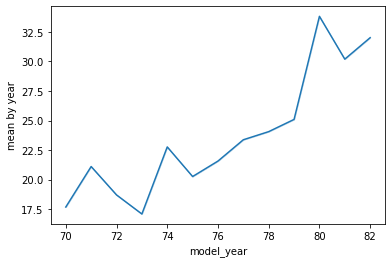

In [91]:
sns.lineplot(data=df, x="model_year", y="mean by year")

<AxesSubplot:xlabel='model_year', ylabel='count by year'>

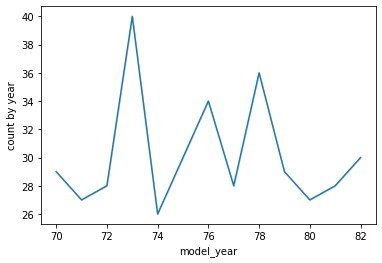

In [92]:
sns.lineplot(data=df, x="model_year", y="count by year")

##### Q2

Create a lmplot (aka a reg plot with multiple plots) where you plot mpg(y) against model year(x) 

and make the countries separate plots / columns and colors. 

Do the same for  weight against year. An example of what you should expect:

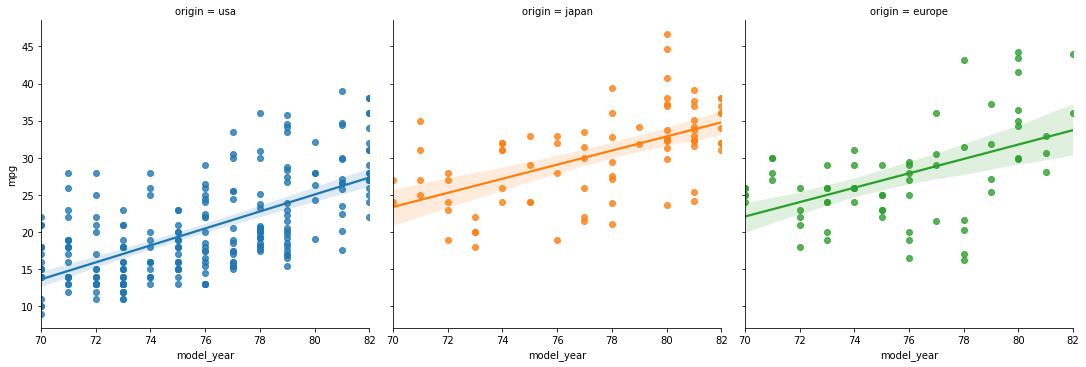

In [93]:
sns.lmplot(x="model_year", y="mpg", col="origin", hue='origin', data=df)

#### Part - 5

##### Q1

Explain any trends you see in the line plots.

1. Over the years, the "mpg" (mileage) value increased. The "mpg" increased strictly after 1976 eventhough there were some ups and downs in initial years

2. As seen in the second line plot, there is no definite pattern in the "count of vehicles" produced in an year. In the year 1973, the production of vehicle count is all time high, whereas all time low production in 1974

##### Q2:

Explain the trends you see in the regression plots. 

1. Firstly, there are more number of cars were manufactured with origin in USA

2. It seems more percentage of points are close to the regression line for the origin USA which means the regression model is good at predicting the "mpg" for the cars origin in USA compared to other origin locations